###  IMPLEMENTATION OF BRESENHAM LINE DRAWING ALGORITHM(PYTHON)

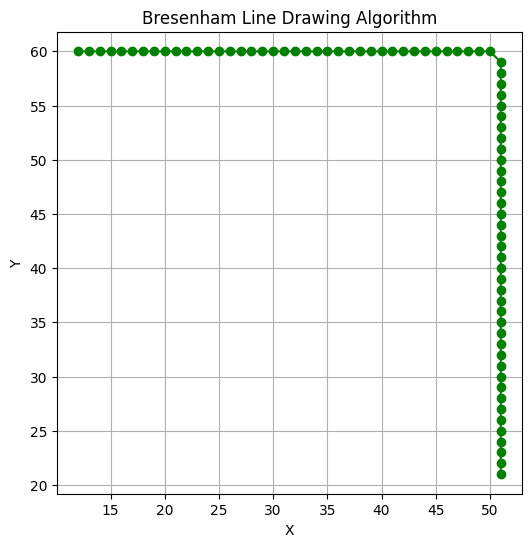

In [4]:
import matplotlib.pyplot as plt
def bresenham_line(x1, y1, x2, y2):
    xes, yes = [], []
    dx = abs(x2- x1)
    dy = abs(y2- y1)
    sx = 1 if x2 >= x1 else-1
    sy = 1 if y2 >= y1 else-1
    x, y = x1, y1
    if dx >= dy:
        p = 2 * dy- dx
        for _ in range(dx + 1):
         xes.append(x)
         yes.append(y)
         x += sx
        if p >= 0:
            y += sy
            p += 2 * dy- 2 * dx
        else:
            p += 2 * dy
    else:
        p = 2 * dx- dy
    for _ in range(dy + 1):
        xes.append(x)
        yes.append(y)
        y += sy
    if p >= 0:
        x += sx
        p += 2 * dx- 2 * dy
    else:
        p += 2 * dx
    return xes, yes
def plot_bresenham(x1, y1, x2, y2):
    xes, yes = bresenham_line(x1, y1, x2, y2)
    plt.figure(figsize=(6, 6))
    plt.plot(xes, yes, marker="o", linestyle="-", color="green")
    plt.title("Bresenham Line Drawing Algorithm")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis("equal")
    plt.show()
plot_bresenham(12,60,50,22)

#### Compare the number of integer additions and multiplications used by DDA and Bresenham.

In [5]:
# Global counters
dda_add = 0
dda_mul = 0
bres_add = 0
bres_mul = 0

# DDA function with operation count
def dda_count(x1, y1, x2, y2):
    global dda_add, dda_mul
    dx = x2 - x1
    dy = y2 - y1
    dda_add += 2  # dx and dy subtraction as integer additions
    steps = int(max(abs(dx), abs(dy)))
    x_inc = dx / steps  # division
    y_inc = dy / steps
    dda_mul += 2      # count as multiplication/division
    x, y = x1, y1
    for _ in range(steps + 1):
        x += x_inc
        y += y_inc
        dda_add += 2   # each step: 1 add for x, 1 add for y

# Bresenham function with operation count
def bresenham_count(x1, y1, x2, y2):
    global bres_add, bres_mul
    dx = x2 - x1
    dy = y2 - y1
    bres_add += 2   # dx and dy subtraction
    x, y = x1, y1
    p = 2*dy - dx
    bres_mul += 1   # multiplication for initial p
    for _ in range(dx):
        if p < 0:
            p += 2*dy
            bres_add += 1
            bres_mul += 1
        else:
            y += 1
            p += 2*(dy - dx)
            bres_add += 2  # y increment + p update
            bres_mul += 2

# Example line
x1, y1, x2, y2 = 0, 0, 10, 6

dda_count(x1, y1, x2, y2)
bresenham_count(x1, y1, x2, y2)

print(f"DDA: integer additions = {dda_add}, multiplications/divisions = {dda_mul}")
print(f"Bresenham: integer additions = {bres_add}, multiplications = {bres_mul}")


DDA: integer additions = 24, multiplications/divisions = 2
Bresenham: integer additions = 18, multiplications = 17
